PART 2: BAYESIAN PROBABILITY
Dataset: IMDb Movie Reviews (50,000 reviews)
Goal: Use Bayes' Theorem to calculate the probability
that a review is positive given a specific keyword

 ── Step 1: Import Libraries ───────────────

 We import pandas to load and manipulate the dataset.
 We import matplotlib to visualize our results at the end.
 No machine learning libraries are used — all calculations
 are done using basic Python math operations only.

In [25]:
# import pandas for math calculation
import pandas as pd
import matplotlib.pyplot as plt

 ── Step 2: Load the Dataset ───────────

This step involved loading the IMDb Movie Reviews dataset
from a CSV file into a pandas DataFrame.
The dataset contains 50,000 movie reviews with two columns:
'review' (the text) and 'sentiment' (positive or negative).

In [24]:
# Load the IMDb dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('/content/IMDB Dataset 2.csv')

# Display the first 5 rows to preview the data structure
print(data.head())

# Display the total number of rows and columns (rows, columns)
print(data.shape)

# Count how many reviews are 'positive' and how many are 'negative'
print(data['sentiment'].value_counts())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
(50000, 2)
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


 ── Step 3: Explore the Dataset Structure ───────────

This step involved examining the dataset in more detail
by looking at the column names, data types, and the number
of non-null values in each column. This is important because
it confirms that both columns 'review' and 'sentiment' have
no missing values and are stored as text (object) data type.
Knowing this helps us confidently move forward with our
Bayesian probability calculations without worrying about
handling missing or incorrect data types.


In [5]:
# Detailed information about the dataset structure
print("=" * 50)
print("DATASET INFO:")
print("=" * 50)
data.info()


DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


── Step 4: Check for Missing Values ───────────

This step involved checking whether there are any missing
values in the dataset. Missing values are empty cells that
contain no data and could cause errors or inaccurate results
during our Bayesian probability calculations. We used
isnull().sum() which returns the total count of missing
values for each column. A result of 0 for both columns
confirms that our dataset is complete and clean, meaning
we can safely proceed without any data cleaning required.

In [7]:
# Check for missing values
print("MISSING VALUES:")
print(data.isnull().sum())

MISSING VALUES:
review       0
sentiment    0
dtype: int64


 ── Step 5: Preprocess the Data ────────

This step involved converting all review text to lowercase.
This is crucial because without lowercasing, the same word
written differently would be treated as three different words.
For example 'Great', 'GREAT' and 'great' all mean the same
thing but Python sees them as completely different words.
By converting everything to lowercase we ensure that our
keyword matching is consistent and accurate across all
50,000 reviews. Without this step we would miss many
keyword matches and get incorrect probability results.

In [8]:
# Convert all reviews to lowercase for consistent keyword matching
data['review'] = data['review'].str.lower()

# Verify it worked by previewing first 5 rows
print(data.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. <br /><br />the...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive


 ── Step 6: Separate Positive and Negative Reviews ─────

This step involved splitting the dataset into two separate
groups — positive reviews and negative reviews. This
separation is necessary because Bayes' Theorem requires us
to calculate probabilities within each group separately.
For example, to calculate the Likelihood P(keyword|Positive)
we need to search ONLY inside positive reviews to find how
many of them contain our keyword. If we searched the entire
dataset instead, we would mix positive and negative reviews
together and get incorrect probability results. Having these
two groups clearly separated makes our calculations accurate
and easy to follow.

In [9]:
# Separate reviews into positive and negative groups
positive_reviews = data[data['sentiment'] == 'positive']
negative_reviews = data[data['sentiment'] == 'negative']

# Verify the split
print("Total Positive Reviews:", len(positive_reviews))
print("Total Negative Reviews:", len(negative_reviews))
print("Total Reviews:", len(data))

Total Positive Reviews: 25000
Total Negative Reviews: 25000
Total Reviews: 50000


Step 7: Define Keywords
This step involved carefully selecting 3 positive and 3 negative keywords that we believe strongly indicate the sentiment of a movie review. The keywords were chosen based on how commonly they appear in movie reviews and how strongly they express a positive or negative feeling.
Positive keywords were chosen because they are strong emotional words that people commonly use when they enjoyed a movie and want to express satisfaction and excitement:

'great' : People use this word to express overall satisfaction with a movie. For example: "This was a great movie!"
'excellent' : People use this word to indicate that the movie was of very high quality. For example: "The acting was excellent!"
'amazing' : People use this word to express excitement and strong positive surprise. For example: "The special effects were amazing!"

Negative keywords were chosen because they are strong emotional words that people commonly use when they did not enjoy a movie and want to express disappointment and frustration:

'terrible' : People use this word to express strong disappointment with a movie. For example: "The story was terrible!"
'awful' : People use this word to indicate that the movie was of very poor quality. For example: "The acting was awful!"
'boring' : People use this word when the movie completely failed to keep them engaged. For example: "The movie was so boring I fell asleep!"

We deliberately avoided neutral words like 'the', 'movie', or 'film' because they appear equally in both positive and negative reviews and would not give us meaningful results in our Bayesian probability calculations.

In [11]:
# Define positive and negative keywords
positive_keywords = ['great', 'excellent', 'amazing']
negative_keywords = ['terrible', 'awful', 'boring']

# Verify
print("Positive Keywords:", positive_keywords)
print("Negative Keywords:", negative_keywords)

Positive Keywords: ['great', 'excellent', 'amazing']
Negative Keywords: ['terrible', 'awful', 'boring']


Step 8: Calculate Total Numbers and Prior → P(Positive)
This step involved calculating the total counts needed for all probability calculations and the Prior probability. The Prior tells us the probability of a review being positive BEFORE we look at any keyword at all. It is simply the proportion of positive reviews in the entire dataset and serves as our starting point in Bayes' Theorem.
A Prior of 0.5 means that without any other information, there is a 50% chance any given review is positive. This makes sense because our dataset is perfectly balanced with 25,000 positive and 25,000 negative reviews.

Formula:  P(Positive) = TotalPositiveReviews / TotalReviviews  ​= 25000/ 50000 = 0.5  





In [13]:
# Calculate total numbers
total_reviews = len(data)
total_positive = len(positive_reviews)
total_negative = len(negative_reviews)

# Calculate Prior: P(Positive)
p_positive = total_positive / total_reviews

# Display results
print("Total Reviews:", total_reviews)
print("Total Positive:", total_positive)
print("Total Negative:", total_negative)
print("Prior P(Positive):", p_positive)

Total Reviews: 50000
Total Positive: 25000
Total Negative: 25000
Prior P(Positive): 0.5


Step 9: Calculate Likelihood → P(keyword | Positive)
This step involved calculating the Likelihood probability. The Likelihood tells us among ONLY positive reviews, what fraction of them contain our keyword. We search exclusively inside positive reviews and count how many of them contain the keyword, then divide by the total number of positive reviews. This is important because it measures how strongly a keyword is associated with positive reviews specifically.

Formila : Positive reviews containing keyword​ / Total Positive Review

In [14]:
# Pick one keyword to start with
keyword = 'great'

# Count positive reviews that contain the keyword 'great'
positive_with_keyword = positive_reviews['review'].apply(
    lambda r: keyword in r
).sum()

# Calculate Likelihood: P(keyword | Positive)
p_keyword_given_positive = positive_with_keyword / total_positive

# Display results
print(f"Keyword: '{keyword}'")
print(f"Positive reviews containing '{keyword}':", positive_with_keyword)
print(f"Total Positive Reviews:", total_positive)
print(f"Likelihood P('{keyword}'|Positive):", p_keyword_given_positive)

Keyword: 'great'
Positive reviews containing 'great': 9281
Total Positive Reviews: 25000
Likelihood P('great'|Positive): 0.37124


Step 10: Calculate Marginal → P(keyword)
This step involved calculating the Marginal probability. The Marginal tells us among ALL reviews (both positive AND negative combined), what fraction of them contain our keyword. Unlike the Likelihood which only searched inside positive reviews, the Marginal searches the entire dataset. This is important because it accounts for the keyword appearing in both positive and negative reviews together and acts as a normalizing factor in Bayes' Theorem to ensure our final probability is correct.

Formula = All reviews containing keyword ​/ Total Review

In [16]:
# Count ALL reviews that contain the keyword 'great'
all_with_keyword = data['review'].apply(
    lambda r: keyword in r
).sum()

# Calculate Marginal: P(keyword)
p_keyword = all_with_keyword / total_reviews

# Display results
print(f"Keyword: '{keyword}'")
print(f"All reviews containing '{keyword}':", all_with_keyword)
print(f"Total Reviews:", total_reviews)
print(f"Marginal P('{keyword}'):", p_keyword)

Keyword: 'great'
All reviews containing 'great': 13807
Total Reviews: 50000
Marginal P('great'): 0.27614



Step 11: Calculate Posterior → P(Positive | keyword)
This step involved calculating the Posterior probability which is the main goal of Bayes' Theorem. The Posterior tells us given that a review contains our keyword, what is the probability that it is a positive review. This is the most important probability because it combines everything we calculated before — the Prior, the Likelihood, and the Marginal — into one final answer. If the Posterior is above 0.5 it means the keyword strongly indicates a positive review, and if it is below 0.5 it means the keyword strongly indicates a negative

Formula : P(Positive∣keyword)= P(keyword∣Positive)×P(Positive) / P(keyword)

P(Positive∣great) = 0.3712×0.5 / 0.2761 = 0.6722

In [17]:
# Calculate Posterior: P(Positive | keyword)
# Using Bayes' Theorem
p_positive_given_keyword = (p_keyword_given_positive * p_positive) / p_keyword

# Display results
print(f"Keyword: '{keyword}'")
print(f"Posterior P(Positive|'{keyword}'):", p_positive_given_keyword)

Keyword: 'great'
Posterior P(Positive|'great'): 0.6721952632722532


Step 12: Calculate All Probabilities for Every Keyword
This step involved looping through all 6 keywords and calculating all four Bayesian probabilities for each one automatically. Instead of writing the same code 6 times separately, we used a loop which follows the DRY principle — Don't Repeat Yourself. This means we write the calculation code only once and the loop takes care of applying it to every keyword one by one. For each keyword the loop calculates the Likelihood, Marginal and Posterior using the same formulas we used in the previous steps.

Formulas used inside the loop:

P(keyword∣Positive) = Positive reviews containing keyword​ / Total Positive Reviews

P(keyword) = All reviews containing keyword / Total Reviews

P(Positive∣keyword) = P(keyword∣Positive)×P(Positive)​ / P(keyword)


In [18]:
# All keywords together
all_keywords = positive_keywords + negative_keywords

# Loop through each keyword and calculate all probabilities
for keyword in all_keywords:

    # ── Likelihood: P(keyword | Positive) ─────────────────
    positive_with_keyword = positive_reviews['review'].apply(
        lambda r: keyword in r
    ).sum()
    p_keyword_given_positive = positive_with_keyword / total_positive

    # ── Marginal: P(keyword) ───────────────────────────────
    all_with_keyword = data['review'].apply(
        lambda r: keyword in r
    ).sum()
    p_keyword = all_with_keyword / total_reviews

    # ── Posterior: P(Positive | keyword) ──────────────────
    p_positive_given_keyword = (p_keyword_given_positive * p_positive) / p_keyword

    # ── Print Results ──────────────────────────────────────
    print(f"\n{'='*45}")
    print(f"  Keyword: '{keyword}'")
    print(f"{'='*45}")
    print(f"  Prior      P(Positive)          = {p_positive:.4f}")
    print(f"  Likelihood P(keyword|Positive)  = {p_keyword_given_positive:.4f}")
    print(f"  Marginal   P(keyword)           = {p_keyword:.4f}")
    print(f"  Posterior  P(Positive|keyword)  = {p_positive_given_keyword:.4f}")


  Keyword: 'great'
  Prior      P(Positive)          = 0.5000
  Likelihood P(keyword|Positive)  = 0.3712
  Marginal   P(keyword)           = 0.2761
  Posterior  P(Positive|keyword)  = 0.6722

  Keyword: 'excellent'
  Prior      P(Positive)          = 0.5000
  Likelihood P(keyword|Positive)  = 0.1174
  Marginal   P(keyword)           = 0.0725
  Posterior  P(Positive|keyword)  = 0.8099

  Keyword: 'amazing'
  Prior      P(Positive)          = 0.5000
  Likelihood P(keyword|Positive)  = 0.0740
  Marginal   P(keyword)           = 0.0496
  Posterior  P(Positive|keyword)  = 0.7463

  Keyword: 'terrible'
  Prior      P(Positive)          = 0.5000
  Likelihood P(keyword|Positive)  = 0.0154
  Marginal   P(keyword)           = 0.0541
  Posterior  P(Positive|keyword)  = 0.1419

  Keyword: 'awful'
  Prior      P(Positive)          = 0.5000
  Likelihood P(keyword|Positive)  = 0.0136
  Marginal   P(keyword)           = 0.0624
  Posterior  P(Positive|keyword)  = 0.1093

  Keyword: 'boring'
  Prior   

Step 13: Create a Summary Table
This step involved storing all the results from our loop into a clean summary table. Instead of reading through individual printed results for each keyword separately, a summary table allows us to see all 6 keywords and their four probabilities side by side in one place. This makes it very easy to compare keywords against each other and draw conclusions about which keywords are the strongest indicators of positive or negative sentiment. We used a list called results to collect all keyword results and then converted it into a pandas DataFrame for a neat and organized display.

Formula used to fill the table:

P(keyword∣Positive) = Positive reviews containing keyword​ / Total Positive Reviews

P(keyword)= All reviews containing keyword​ / Total reviews


P(Positive∣keyword) = P(keyword∣Positive)×P(Positive) /  P(keyword)

In [19]:
# Create a summary table of all results
results = []

for keyword in all_keywords:

    # Likelihood
    positive_with_keyword = positive_reviews['review'].apply(
        lambda r: keyword in r
    ).sum()
    p_keyword_given_positive = positive_with_keyword / total_positive

    # Marginal
    all_with_keyword = data['review'].apply(
        lambda r: keyword in r
    ).sum()
    p_keyword = all_with_keyword / total_reviews

    # Posterior
    p_positive_given_keyword = (p_keyword_given_positive * p_positive) / p_keyword

    # Store results
    results.append({
        'Keyword': keyword,
        'Type': 'Positive' if keyword in positive_keywords else 'Negative',
        'Prior P(Positive)': round(p_positive, 4),
        'Likelihood P(keyword|Positive)': round(p_keyword_given_positive, 4),
        'Marginal P(keyword)': round(p_keyword, 4),
        'Posterior P(Positive|keyword)': round(p_positive_given_keyword, 4)
    })

# Display as a neat table
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

  Keyword     Type  Prior P(Positive)  Likelihood P(keyword|Positive)  Marginal P(keyword)  Posterior P(Positive|keyword)
    great Positive                0.5                          0.3712               0.2761                         0.6722
excellent Positive                0.5                          0.1174               0.0725                         0.8099
  amazing Positive                0.5                          0.0740               0.0496                         0.7463
 terrible Negative                0.5                          0.0154               0.0541                         0.1419
    awful Negative                0.5                          0.0136               0.0624                         0.1093
   boring Negative                0.5                          0.0247               0.0623                         0.1983


Step 14: Visualize Results with a Bar Chart
This step involved creating a bar chart to visually represent the Posterior probability for each keyword. Visualization is important because it makes it much easier to understand and compare results at a glance rather than reading through numbers in a table. We used green bars for positive keywords and red bars for negative keywords. We also added a blue dotted line at 0.5 which represents our Prior probability. This line acts as a reference point — any bar above it means the keyword strongly indicates a positive review and any bar below it means the keyword strongly indicates a negative review.

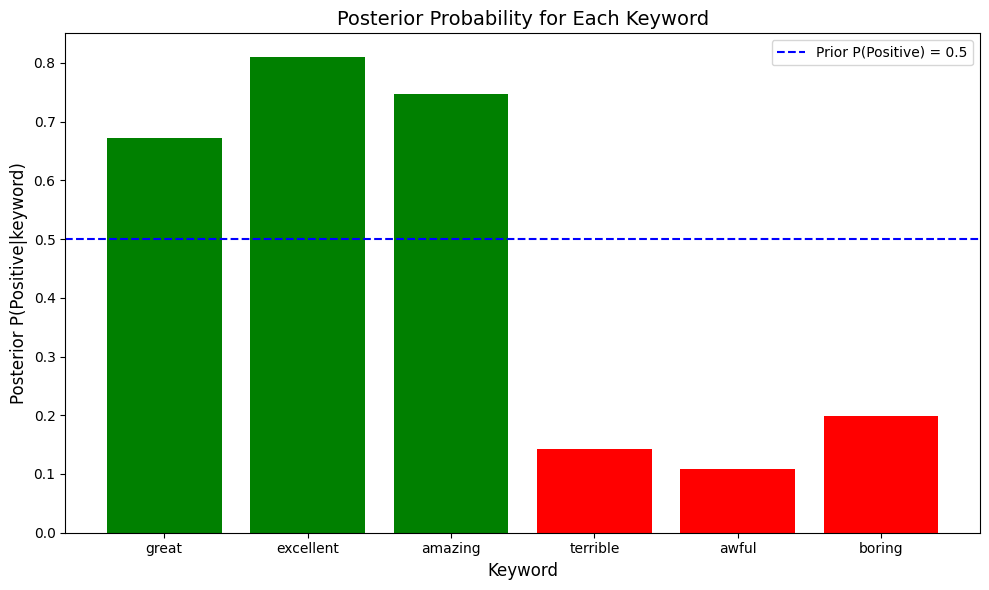

In [22]:
import matplotlib.pyplot as plt

# ── Create Bar Chart ───────────────────────────────────────
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each keyword
colors = ['green' if k in positive_keywords else 'red' for k in results_df['Keyword']]

# Plot the bars
ax.bar(results_df['Keyword'], results_df['Posterior P(Positive|keyword)'], color=colors)

# Add a line showing the Prior (0.5)
ax.axhline(y=0.5, color='blue', linestyle='--', label='Prior P(Positive) = 0.5')

# Labels and title
ax.set_title('Posterior Probability for Each Keyword', fontsize=14)
ax.set_xlabel('Keyword', fontsize=12)
ax.set_ylabel('Posterior P(Positive|keyword)', fontsize=12)
ax.legend()

plt.tight_layout()
plt.show()